# Pandas DataFrames 
[The official project homepage](https://pandas.pydata.org)

* Goal
    * Extend what we learned about Series objects in the previous tutorial to their 2D counterpart - DataFrames
    * Develop some tools for dealing with missing data (not exhaustive, but a start)

## DataFrames

[Pandas quick start guide for DataFrames](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

* A DataFrame (DF) is a labeled data struture that can be thought of as a 2D extension of the Series objects that we discussed in the first part of the tutorial
* A DF can accept many types of input, multiple Series, a dict of 1D arrays, another DF, etc
* Like a Series, DFs contain data values and their labels. Because we're now dealing with a 2D structure, we call the **row labels the index argument** and the **column labels the column argument**. 
    * Like a Series, if you don't explicitly assign row and column labels, then they will be auto-generated (but not as useful as specifying the labels yourself!)

<div class="alert alert-info">
Much of what we learned about Series objects will generalize to DFs, so here we'll focus on some of key functionality that might not be obvious based on the first part of the tutorial.
</div>

<div class="alert alert-info">
One more quick note: if using an older version of Python (earlier than 3.6) and Pandas (earlier than 0.23) and you create a DF from a dict without explicitly specifying column names, then the column names will be entered into the DF based on lexical order
</div>

## Import libs

In [6]:
# import a generic pandas object and also a few specific functions that we'll use
import pandas as pd 
import numpy as np
from google.colab import files

## Upload a file to the /content folder on google colab
* Select the file you want to upload (the csv file that I sent out)
* It will load into your 'contents' folder
* Then you can interact with it just like a normal file on your hardrive



In [ ]:
%ls

annual_temp2.csv  sample_data/


In [ ]:
files.upload()

Saving annual_temp_csv2.csv to annual_temp_csv2.csv


{'annual_temp_csv2.csv': b'Source,Year,Mean\r\nGCAG,2016,0.9363\r\nGISTEMP,2016,\r\nGCAG,2015,\r\nGISTEMP,2015,0.87\r\nGCAG,2014,0.7408\r\nGISTEMP,2014,0.74\r\nGCAG,2013,0.6679\r\nGISTEMP,2013,0.65\r\nGCAG,2012,0.624\r\nGISTEMP,2012,0.63\r\nGCAG,2011,0.5788\r\nGISTEMP,2011,0.6\r\nGCAG,2010,0.7014\r\nGISTEMP,2010,0.71\r\nGCAG,2009,0.6367\r\nGISTEMP,2009,0.64\r\nGCAG,2008,0.5419\r\nGISTEMP,2008,0.54\r\nGCAG,2007,0.61\r\nGISTEMP,2007,0.66\r\nGCAG,2006,0.6125\r\nGISTEMP,2006,0.63\r\nGCAG,2005,0.6585\r\nGISTEMP,2005,0.69\r\nGCAG,2004,0.5783\r\nGISTEMP,2004,0.55\r\nGCAG,2003,0.6134\r\nGISTEMP,2003,0.62\r\nGCAG,2002,0.6023\r\nGISTEMP,2002,0.63\r\nGCAG,2001,0.5473\r\nGISTEMP,2001,0.55\r\nGCAG,2000,0.4262\r\nGISTEMP,2000,0.42\r\nGCAG,1999,0.4438\r\nGISTEMP,1999,0.42\r\nGCAG,1998,0.6344\r\nGISTEMP,1998,0.64\r\nGCAG,1997,0.5187\r\nGISTEMP,1997,0.48\r\nGCAG,1996,0.3228\r\nGISTEMP,1996,0.35\r\nGCAG,1995,0.4577\r\nGISTEMP,1995,0.46\r\nGCAG,1994,0.3409\r\nGISTEMP,1994,0.32\r\nGCAG,1993,0.2853\r\nGIST

### Remove unwanted files...

In [ ]:
%ls

 annual_temp2.csv           'annual_temp_csv2 (2).csv'   sample_data/
'annual_temp_csv2 (1).csv'   annual_temp_csv2.csv


In [ ]:
%rm *.csv

In [ ]:
%pycat annual_temp_csv2.csv

## Make a DataFrame object to hold the contents of the data set
[DataFrame help page](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)

* Just like with the pd.Series call, you can specify the data, index labels (row labels in this case)
* In addition to row labels, you can also specify column labels (with 'columns')
* Can also specify data type (default is inferred)
* If you read in the data from a csv file, you will be able to inheret row and column labels (if they are specified in the file). 

In [ ]:
# make the call to pd.DataFrames to create the DF - usage much like pd.Series
df = pd.read_csv('annual_temp_csv2.csv')

In [ ]:
# take a look at the output...
# compare to print(df) - looks nicer with display thanks to iPython backend 
display(df)   

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,NaN
2,GCAG,2015,NaN
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408
...,...,...,...
269,GISTEMP,1882,-0.1000
270,GCAG,1881,-0.0628
271,GISTEMP,1881,-0.1200
272,GCAG,1880,-0.1148


In [ ]:
# another handy display function...good for large dfs that are too big to fit - 
# at least you can get an idea of the overall structure
df.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,NaN
2,GCAG,2015,NaN
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408


## Get a high-level summary of the data using built-in functionality of DataFrame object
[API reference page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

* What do you notice about the two counts for Year and for Mean

In [ ]:
df.describe()

,Year,Mean
count,274.000000,269.000000
mean,1948.000000,0.032148
std,39.619805,0.312434
min,1880.000000,-0.470000
25%,1914.000000,-0.205500
50%,1948.000000,-0.050000
75%,1982.000000,0.227300
max,2016.000000,0.936300


## Just like with Series object, can compute mean, std, etc

In [ ]:
df['Year'].mean()

1948.0

### remember that you can also call by field...I prefer by name like ['Mean'] to avoid confusion with built in methods/functions, but either will work

In [ ]:
 #df['Mean'].std()
 #df.Mean.std()
 df['Mean'].mean()

0.032147583643122576

### By default, mean, std etc will skip (ignore) missing values (NaNs)
* Sometimes, its good to do a sanity check if you think there are missing values. 
* Can do this by chosing to NOT skip the NaNs...in which case if they exist you'll get back NaN as the answer!
* Then you know that there are NaNs in the data set. 

In [ ]:
df['Mean'].mean(skipna=False)

nan

## Find missing values in your data and deal with them (NaNs)
* Can apply to just one column at a time 
* note that you can call the isna method from the object directly
* To make this work, you index into the data frame where 'Mean' is a Nan 

In [ ]:
# isolate just the rows (indicies) where Mean is NaN
df['Mean'].isna()

0      False
1       True
2       True
3      False
4      False
       ...  
269    False
270    False
271    False
272    False
273    False
Name: Mean, Length: 274, dtype: bool

In [ ]:
# now index into df using the true/false sequence from above!
df[df['Mean'].isna()]

,Source,Year,Mean
1,GISTEMP,2016,NaN
2,GCAG,2015,NaN
237,GISTEMP,1898,NaN
238,GCAG,1897,NaN
239,GISTEMP,1897,NaN


#### Or do the opposite, isolate just the rows where Mean is not NaN (i.e. its a real number)

In [ ]:
df[df['Mean'].notna()]

,Source,Year,Mean
0,GCAG,2016,0.9363
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408
5,GISTEMP,2014,0.7400
6,GCAG,2013,0.6679
...,...,...,...
269,GISTEMP,1882,-0.1000
270,GCAG,1881,-0.0628
271,GISTEMP,1881,-0.1200
272,GCAG,1880,-0.1148


### Can deal with NaNs lots of ways...
* Can make a new DF without them
* can assign the mean of all of the data to NaNs

In [ ]:
# make a new df, but only keep the non-NaN entries
df2 = df[df['Mean'].notna()]
df2.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408
5,GISTEMP,2014,0.7400
6,GCAG,2013,0.6679


#### Fill the NaN with the mean of the column!
* Or any other value...just pass it into fillna
* see also 'interpolate' for more functions like this 
* NEED TO ASSIGN output to apply changes..e.g df = df.fillna(....)

In [ ]:
print(df['Mean'].mean())

df2=df.fillna(df['Mean'].mean())

df2.head()

0.032147583643122576


,Source,Year,Mean
0,GCAG,2016,0.936300
1,GISTEMP,2016,0.032148
2,GCAG,2015,0.032148
3,GISTEMP,2015,0.870000
4,GCAG,2014,0.740800


## Pull out selected data and remove from DF

In [ ]:
df.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,NaN
2,GCAG,2015,NaN
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408


In [ ]:
# or your could self assign df = df[] here to update existing data frame
df2 = df[df['Source'] == 'GISTEMP']
df2.head()

,Source,Year,Mean
1,GISTEMP,2016,NaN
3,GISTEMP,2015,0.87
5,GISTEMP,2014,0.74
7,GISTEMP,2013,0.65
9,GISTEMP,2012,0.63


## Grab a range of rows...across a set of years, for example

In [ ]:
df2 = df[(df['Year']>1990) & (df['Year']<=2015)]
display(df2)

,Source,Year,Mean
2,GCAG,2015,NaN
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408
5,GISTEMP,2014,0.7400
6,GCAG,2013,0.6679
7,GISTEMP,2013,0.6500
8,GCAG,2012,0.6240
9,GISTEMP,2012,0.6300
10,GCAG,2011,0.5788
11,GISTEMP,2011,0.6000


## Apply several filters at once!
* Be careful here - readability of code is the prime directive...don't write one-liners that are so dense that nobody can understand them!

In [ ]:
df2 = df[(df['Source']=='GCAG') & (df['Year']>1990) & (df['Year']<=2015)]
display(df2)

## More on indexing and selection of specific coordinates in a DF

### Row selection - this is a bit more complex as there are many methods
* You can use df.loc to select a row by its label name
* You can use df.iloc to select a row by its integer location (from 0 to length-1 of the axis)
* You can use boolean vectors to select a set of rows that satisfy some condition


Contrary to usual slicing conventions, both the start and the stop indices are included when using the DF.LOC option...see below for demo. This makes sense because you're indexing by label name, not by a zero-based integer index. 


In [ ]:
#for the next steps, load annual_temp2
files.upload()

Saving annual_temp2.csv to annual_temp2 (1).csv


{'annual_temp2.csv': b'Year,Mean,Std\r\n2016,0.9363,0.751983201423804\r\n2015,,\r\n2014,0.7408,0.308372327229529\r\n2013,0.6679,0.0642260963534021\r\n2012,0.624,0.369924308791563\r\n2011,0.5788,0.519886611755557\r\n2010,0.7014,0.00554037371614102\r\n2009,0.6367,0.710221086775733\r\n2008,0.5419,0.13596775970467\r\n2007,0.61,0.600989623657847\r\n2006,0.6125,0.477444551272558\r\n2005,0.6585,0.200089544839782\r\n2004,0.5783,0.350636861158391\r\n2003,0.6134,0.175530439616115\r\n2002,0.6023,0.958127276637697\r\n2001,0.5473,0.65481159234971\r\n2000,0.4262,0.315161882226467\r\n1999,0.4438,0.583836856570891\r\n1998,0.6344,0.318651207090184\r\n1997,0.5187,0.793294701283796\r\n1996,0.3228,0.297115830643744\r\n1995,0.4577,0.179343960389974\r\n1994,0.3409,0.484949551525664\r\n1993,0.2853,0.882884329517337\r\n1992,0.2571,0.562569395616625\r\n1991,0.4055,0.588429206506485\r\n1990,0.4328,0.147454693380858\r\n1989,0.297,0.721697423072878\r\n1988,0.3757,0.211935846229154\r\n1987,0.3696,0.645365247533375

In [ ]:
%pycat annual_temp2.csv

In [ ]:
df = pd.read_csv('annual_temp2.csv', index_col=0)

In [ ]:
df.head()

,Mean,Std
Year,,
2016,0.9363,0.751983
2015,NaN,NaN
2014,0.7408,0.308372
2013,0.6679,0.064226
2012,0.6240,0.369924


### This returns the data associated with one row

In [ ]:
df.loc[2014]

Mean    0.740800
Std     0.308372
Name: 2014, dtype: float64

### this returns the rows associated with a set of years specified in a list

In [ ]:
# non-contiguous entries
df2 = df.loc[[1999,2015,2016,1880]]
df2.head()

,Mean,Std
Year,,
1999,0.4438,0.583837
2015,NaN,NaN
2016,0.9363,0.751983
1880,-0.1148,0.823953


In [ ]:
df.head()

,Mean,Std
Year,,
2016,0.9363,0.751983
2015,NaN,NaN
2014,0.7408,0.308372
2013,0.6679,0.064226
2012,0.6240,0.369924


In [ ]:
# note that years run in descending order...
df.loc[2014:2016]

,Mean,Std
Year,,


In [ ]:
# but this will work...
df.loc[2016:2010:2]

,Mean,Std
Year,,
2016,0.9363,0.751983
2014,0.7408,0.308372
2012,0.6240,0.369924
2010,0.7014,0.005540


In [ ]:
# flip the data frame upside down
df=df.loc[::-1]

In [ ]:
df.head()

,Mean,Std
Year,,
1880,-0.1148,0.823953
1881,-0.0628,0.180163
1882,-0.0648,0.513378
1883,-0.1424,0.146379
1884,-0.2009,0.882296


In [ ]:
# now the years run in order
df.loc[1990:2016]

,Mean,Std
Year,,
1990,0.4328,0.147455
1991,0.4055,0.588429
1992,0.2571,0.562569
1993,0.2853,0.882884
1994,0.3409,0.484950
1995,0.4577,0.179344
1996,0.3228,0.297116
1997,0.5187,0.793295
1998,0.6344,0.318651


In [ ]:
# select rows and select colums
#df.loc[2016:2014, 'Mean':'Std']
df.loc[2014:2016, 'Mean':'Std']

Year
2014    0.7408
2015       NaN
2016    0.9363
Name: Mean, dtype: float64

### iloc does indexing by row location (not label)
* use normal rules of slicing here...start:stop:step

In [ ]:
# the first 10
df.iloc[:10:2]

# # reverse
# df.iloc[::-1]

# # every other
# df.iloc[::2]


0.751983201423804

## Adding a column is easy and can be done dynamically (on the fly)
* Make a new column of True and False to mark years above/below mean temp deviation

In [ ]:
mean_temp = df['Mean'].mean()

print('mean temp:', mean_temp)

# then populate the new column
df['HighLow'] = df['Mean']>mean_temp

df.head()

mean temp: 0.043760740740740725


,Mean,Std,HighLow
Year,,,
1880,-0.1148,0.823953,False
1881,-0.0628,0.180163,False
1882,-0.0648,0.513378,False
1883,-0.1424,0.146379,False
1884,-0.2009,0.882296,False


## If you want to convert values in a column, can be a little tricky...
* Use what you might think is the intuitive way to convert True to 1 and False to 0 in our new column 'HighLow'
* **This throws a weird warning because you're trying to modify the thing that you're using as an index!**

In [ ]:
df.HighLow[df.HighLow==True] = 1  #df['HighLow']
df.HighLow[df.HighLow==False] = 0
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mean,Std,HighLow
Year,,,
2016,0.9363,0.751983,1.0
2015,NaN,NaN,0.0
2014,0.7408,0.308372,1.0
2013,0.6679,0.064226,1.0
2012,0.6240,0.369924,1.0


## Solution - use .loc to return the information and then modify it

In [ ]:
# reload our df, re-create a new version of our HighLow column

df = pd.read_csv('annual_temp2.csv', index_col=0)

# make our new column again. 
mean_temp = df['Mean'].mean()

print('mean temp:', mean_temp)

# then populate the new column
df['HighLow'] = df['Mean']>mean_temp

df.head()

mean temp: 0.04376074074074073


,Mean,Std,HighLow
Year,,,
2016,0.9363,0.751983,True
2015,NaN,NaN,False
2014,0.7408,0.308372,True
2013,0.6679,0.064226,True
2012,0.6240,0.369924,True


### like this...using the .loc method ensures that things don't get confused...

In [ ]:
df.loc[df['HighLow']==True, 'HighLow'] = 1
df.loc[df['HighLow']==False, 'HighLow'] = 0
df.head()

,Mean,Std,HighLow
Year,,,
2016,0.9363,0.751983,1
2015,NaN,NaN,0
2014,0.7408,0.308372,1
2013,0.6679,0.064226,1
2012,0.6240,0.369924,1


## Access specific row and columns!

In [ ]:
# flip it over to chronological order so its a little more intuitive to slice
df = df.loc[::-1]
df.head()

,Mean,Std,HighLow
Year,,,
1880,-0.1148,0.823953,False
1881,-0.0628,0.180163,False
1882,-0.0648,0.513378,False
1883,-0.1424,0.146379,False
1884,-0.2009,0.882296,False


In [ ]:
# just data from one year from just the "Mean" column
df.loc[2016, 'Mean']

0.9363

In [ ]:
# a range of years
df.loc[1880:1884, 'Mean']

Year
1880   -0.1148
1881   -0.0628
1882   -0.0648
1883   -0.1424
1884   -0.2009
Name: Mean, dtype: float64

In [ ]:
# range of rows and columns
df.loc[1880:1884, ['Mean','HighLow']]

,Mean,HighLow
Year,,
1880,-0.1148,False
1881,-0.0628,False
1882,-0.0648,False
1883,-0.1424,False
1884,-0.2009,False


In [ ]:
# note that the order in which you ask for columns impacts the output
row_ind = [1880,1980]
col_ind = ['HighLow', 'Mean']
df2 = df.loc[row_ind, col_ind]
df2.head()

,HighLow,Mean
Year,,
1880,False,-0.1148
1980,True,0.2637


### A few more examples of using iloc to index into specific rows,columns

In [ ]:
df.head()

,Mean,Std
Year,,
2016,0.9363,0.751983
2015,NaN,NaN
2014,0.7408,0.308372
2013,0.6679,0.064226
2012,0.6240,0.369924


In [ ]:
df.iloc[:20:2]

,Mean,Std
Year,,
2016,0.9363,0.751983
2014,0.7408,0.308372
2012,0.6240,0.369924
2010,0.7014,0.005540
2008,0.5419,0.135968
2006,0.6125,0.477445
2004,0.5783,0.350637
2002,0.6023,0.958127
2000,0.4262,0.315162


In [ ]:
df.iloc[:10, 0]

Year
2016    0.9363
2015       NaN
2014    0.7408
2013    0.6679
2012    0.6240
2011    0.5788
2010    0.7014
2009    0.6367
2008    0.5419
2007    0.6100
Name: Mean, dtype: float64

## Deleting columns...


In [ ]:
df_temp = df.copy()

In [ ]:
df_temp.head()

,Mean,Std
Year,,
2016,0.9363,0.751983
2015,NaN,NaN
2014,0.7408,0.308372
2013,0.6679,0.064226
2012,0.6240,0.369924


In [ ]:
# using the del command will delete a column from the DF

# make an explicit copy! (why???) so we don't overwrite our original data frame
df2 = df_temp.copy()

del df2['Mean']

df2.head()

,Std
Year,
2016,0.751983
2015,NaN
2014,0.308372
2013,0.064226
2012,0.369924


In [ ]:
df_temp.head()

,Mean,Std
Year,,
2016,0.9363,0.751983
2015,NaN,NaN
2014,0.7408,0.308372
2013,0.6679,0.064226
2012,0.6240,0.369924


## Replace method
* first param is what you want to replace (can be any data type as needed)
* second param is what you want to replace it with

In [ ]:
# make a df from a dictionary

data = {'D1' : [6,8,4,3], 'D2' : [4,4,2,1]}

df = pd.DataFrame(data)

df.head()

,D1,D2
0,6,4
1,8,4
2,4,2
3,3,1


In [ ]:
df = df.replace(4, 7)
df.head()

,D1,D2
0,6,7
1,8,7
2,7,2
3,3,1


## Set index from a column in a data frame

In [ ]:
data = {'D1': [6,8,4,3], 'D2': [4,4,2,1], 'D3': [2018,2019,2020,2021]}

df = pd.DataFrame(data)

df.head()

,D1,D2,D3
2018,6,4,2018
2019,8,4,2019
2020,4,2,2020
2021,3,1,2021


In [ ]:
df = df.set_index('D3')
df.head()

,D1,D2
D3,,
2018,6,4
2019,8,4
2020,4,2
2021,3,1


## Loop over data frame and compute the mean of 'w' consecutive rows


In [2]:
# make a df
import random as random

random.seed(10)

n_data_pnts = 100

d1=[]
d2=[]
for i in range(n_data_pnts):
  d1.append(random.randint(0,40))
  d2.append(random.randint(0,30))

# then make a data frame
df = pd.DataFrame({'D1':d1, 'D2':d2})
df.head()

,D1,D2
0,36,1
1,27,15
2,36,0
3,13,14
4,31,26


In [8]:
# use iloc approach
win = 7   # moving average window

n = len(df)

# init a list to append moving average
m_avg = []

# init a counter to keep track of where we are in the DF
for i in range(0,n,win):
  m_avg.append(np.mean(df['D1'].iloc[i:i+win]))

# print out our list of windowed averages
print(m_avg)
print(len(m_avg))

[24.285714285714285, 21.0, 19.857142857142858, 15.142857142857142, 23.428571428571427, 16.428571428571427, 17.285714285714285, 18.285714285714285, 13.285714285714286, 24.714285714285715, 24.0, 24.0, 15.428571428571429, 26.0, 33.0]
15


In [10]:
# another approach
list_d1=list(df['D1'])
m_avg=[]
for i in range(0,n,win):
  m_avg.append(np.mean(list_d1[i:i+win]))

print(m_avg)

[24.285714285714285, 21.0, 19.857142857142858, 15.142857142857142, 23.428571428571427, 16.428571428571427, 17.285714285714285, 18.285714285714285, 13.285714285714286, 24.714285714285715, 24.0, 24.0, 15.428571428571429, 26.0, 33.0]


## Preview of next week - quick intro to plotting

In [ ]:
import matplotlib.pyplot as plt

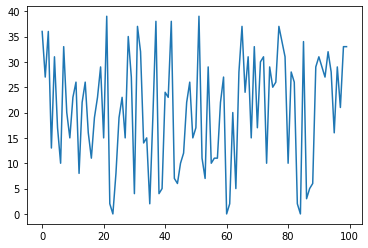

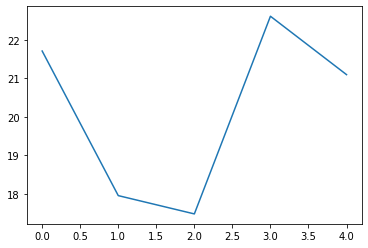

In [ ]:
plt.plot(df['D1'])
plt.show()

plt.plot(m_avg)
plt.show()